# 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\2. Data Immersion\Achievements 6 - Tasks\3. Data\Prepared Data'

In [3]:
print(path)

C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\2. Data Immersion\Achievements 6 - Tasks\3. Data\Prepared Data


In [4]:
# Reading CSV files - cleaned_covid_final.csv
df= pd.read_csv(os.path.join(path,'cleaned_covid_final.csv'), index_col = False)

In [29]:
df.head(10)

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,2023-09-24,2020-01-01 00:00:00,2020-01-31 00:00:00,2020,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0
1,2023-09-24,2020-02-01 00:00:00,2020-02-29 00:00:00,2020,2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0
2,2023-09-24,2020-03-01 00:00:00,2020-03-31 00:00:00,2020,3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0
3,2023-09-24,2020-04-01 00:00:00,2020-04-30 00:00:00,2020,4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0
4,2023-09-24,2020-05-01 00:00:00,2020-05-31 00:00:00,2020,5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0
5,2023-09-24,2020-06-01 00:00:00,2020-06-30 00:00:00,2020,6.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0
6,2023-09-24,2020-07-01 00:00:00,2020-07-31 00:00:00,2020,7.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0
7,2023-09-24,2020-08-01 00:00:00,2020-08-31 00:00:00,2020,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0
8,2023-09-24,2020-09-01 00:00:00,2020-09-30 00:00:00,2020,9.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,5.0,2.0,One or more data cells have counts between 1-9...
9,2023-09-24,2020-10-01 00:00:00,2020-10-31 00:00:00,2020,10.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0


# 2. Data Cleaning

In [30]:
#As these graphs can only work with continuous variables, I need to ensure that all relevant columns have a numerical
#data type that is compatible with the heatmap, scatterplot and other plots.
df.dtypes

Data As Of            datetime64[ns]
Start Date                    object
End Date                      object
Year                           int64
Month                        float64
State                         object
Condition Group               object
Condition                     object
ICD10_codes                   object
Age Group                     object
COVID-19 Deaths              float64
Number of Mentions           float64
Flag                          object
dtype: object

In [24]:
df.shape

(430560, 13)

In [25]:
# Check for missing values

df.isnull().sum() # No missing values!

Data As Of            0
Start Date            0
End Date              0
Year                  0
Month                 0
State                 0
Condition Group       0
Condition             0
ICD10_codes           0
Age Group             0
COVID-19 Deaths       0
Number of Mentions    0
Flag                  0
dtype: int64

In [26]:
# Find duplicates

df_dups = df[df.duplicated()]

In [28]:
for col in df.columns.tolist():
    weird = (df[[col]].map(type) != df[[col]].iloc[0].map(type)).any(axis=1)
    if len(df[weird]) > 0:
        print(col)

## 3. Exploring Relationships

In [31]:
#Create a correlation matrix using pandas
#Select only the numerical columns from the DataFrame to avoid errors
numerical_columns = df.select_dtypes(include=['int', 'float'])

#The index ('rank') is one of the numerical columns, so we will drop it

if 'rank' in numerical_columns.columns:
    numerical_columns = numerical_columns.drop(columns=['rank'])

#Now, we create the correlation matrix with the appropriate data
numerical_columns.corr()

,Year,Month,COVID-19 Deaths,Number of Mentions
Year,1.000000,-0.132253,-0.069648,-0.069267
Month,-0.132253,1.000000,0.007993,0.007978
COVID-19 Deaths,-0.069648,0.007993,1.000000,0.989005
Number of Mentions,-0.069267,0.007978,0.989005,1.000000


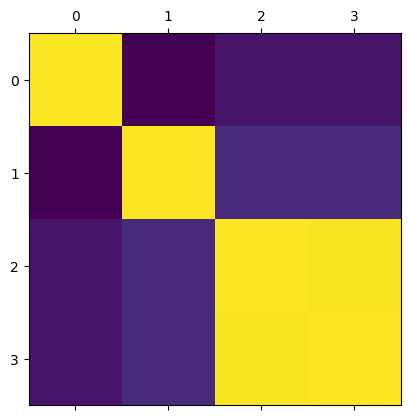

In [33]:
#Now, we use the above data to create a correlation heatmap using matplotlib

plt.matshow(numerical_columns.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

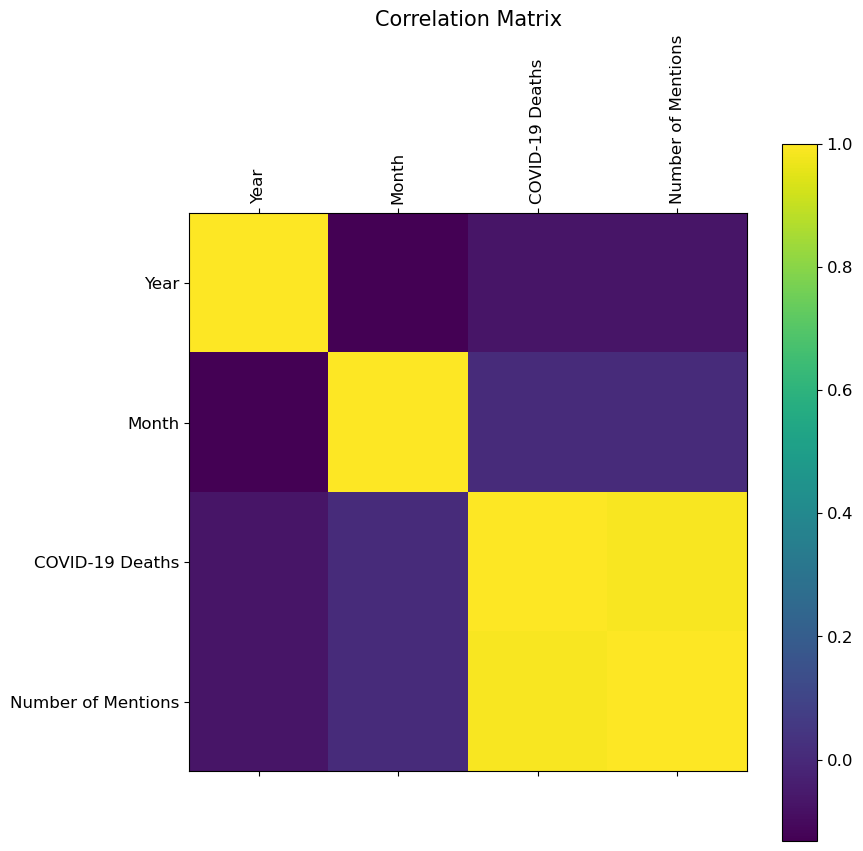

In [34]:
#Next, we add a legend, column labels, change the size of the heatmap and add a title
f=plt.figure(figsize=(9,9)) #This establishes the size of the heatmap
plt.matshow(numerical_columns.corr(), fignum=f.number) #Defines the type of plot
plt.xticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12, rotation=90)
plt.yticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12) #No need for rotation in y-axis
cb=plt.colorbar() #add a color legend (optimizes itseld based on colors used in heatmap)
cb.ax.tick_params(labelsize=12) #add font size
plt.title('Correlation Matrix', fontsize=15) #Creates titles



In the context of a correlation matrix or heatmap involving the variables Year, Months, COVID-19, and Number of Mentions, the color intensity is used to represent the strength and direction of the relationship between two variables.

In the legend, darker colors indicate a stronger negative relationship between two variables. This means that as one variable increases, the other tends to decrease. For example, if there is a dark-colored square between Year and Number of Mentions, it suggests that as the years progress, the number of mentions might be decreasing.

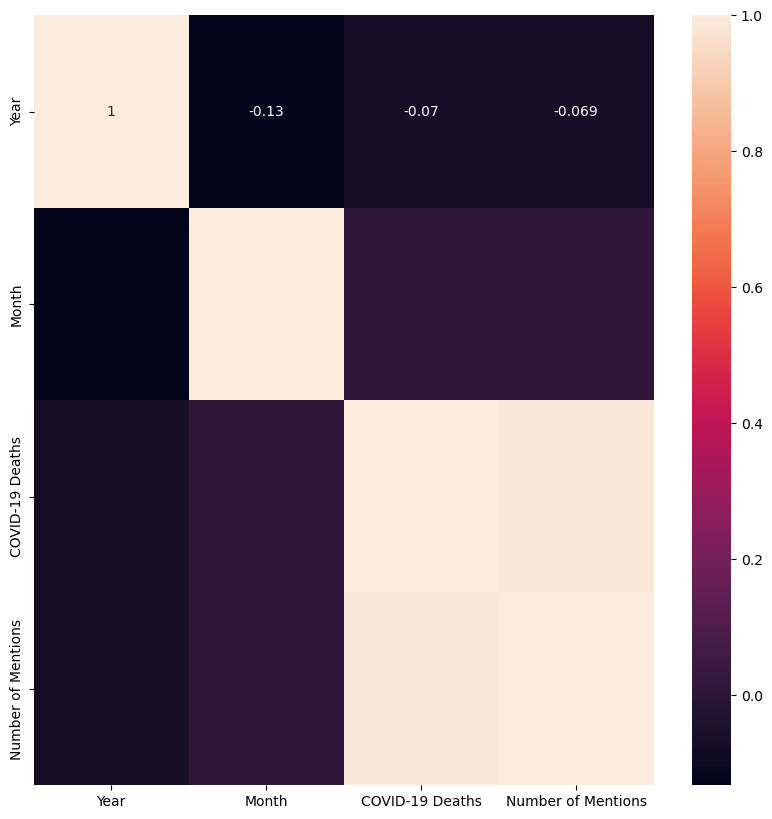

In [35]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(numerical_columns.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The lighter the color, the stronger the positive relationship; conversely, the darker the color, the stronger the negative relationship.

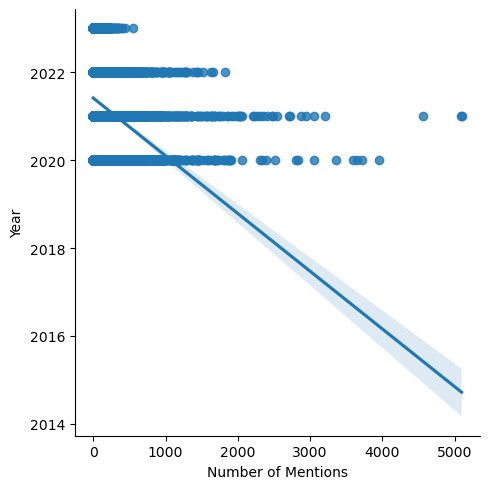

In [41]:
#Create a scatterplot for the "Year" and "Number of Mentions" columns in seaborn

sns.lmplot(y = 'Year', x = 'Number of Mentions', data = numerical_columns)

A downward-sloping line in a scatterplot between Year and Number of Mentions, it signifies that there is a negative correlation between these two variables. Specifically, this pattern suggests that as time progresses (i.e., as the years increase), the number of mentions is decreasing.
The downward trend might also reflect changing priorities over time. For example, if the scatterplot tracks mentions of a health condition before and after the emergence of a new health crisis (like COVID-19), the drop could indicate that focus has shifted to the more pressing issue.

Overall, the downward trend in the scatterplot provides a visual cue that something has changed over time, leading to a decrease in how frequently the subject is mentioned.

In [43]:
#Creating a segmented df with the variables being used in the pair plot
sub_df=numerical_columns[['Year', 'Month', 'COVID-19 Deaths', 'Number of Mentions']]

C:\Users\rajkaran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajkaran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajkaran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajkaran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

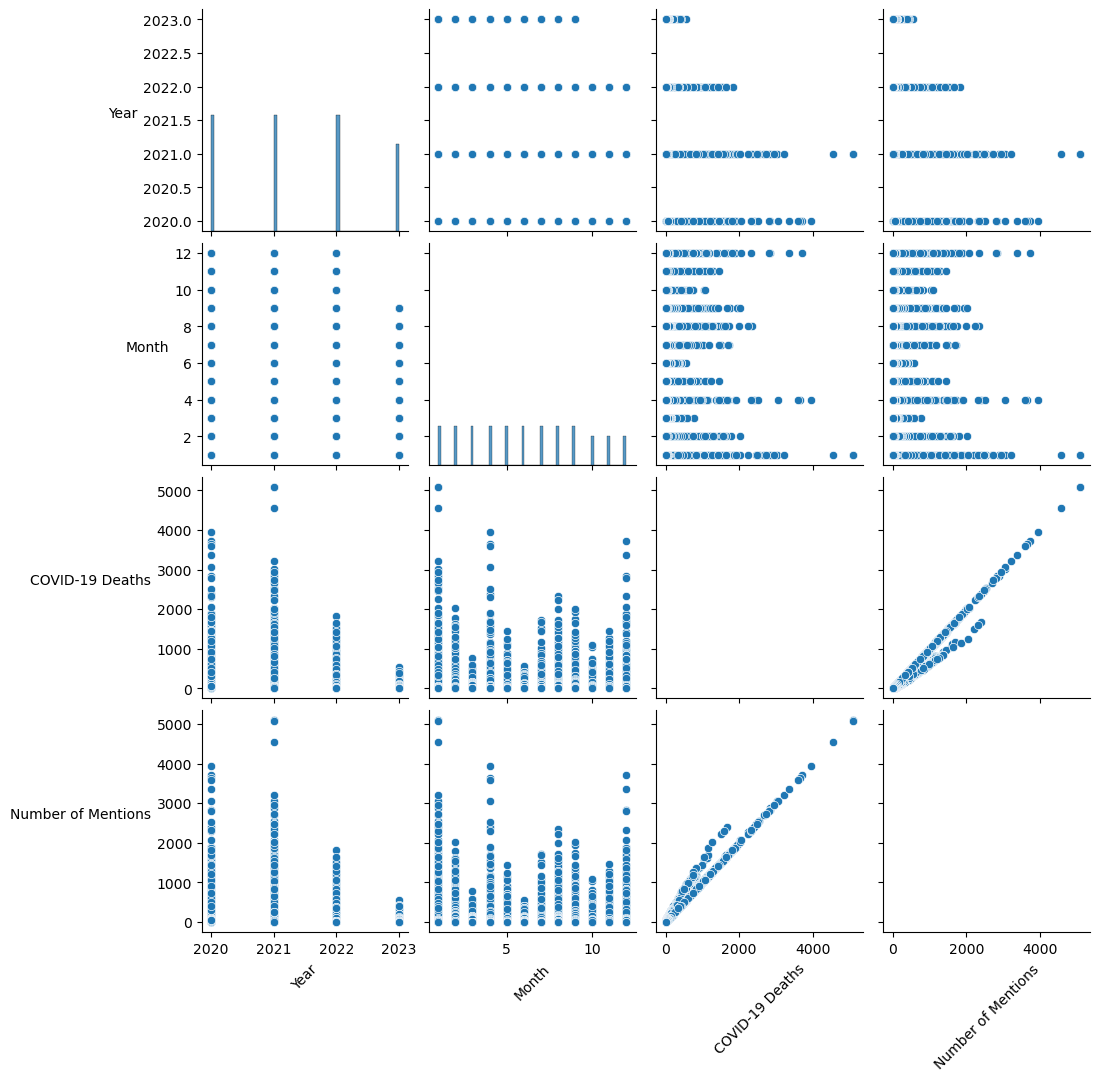

In [44]:
labels=['Year', 'Month', 'COVID-19 Deaths', 'Number of Mentions']
x=sns.pairplot(sub_df)
for ax in x.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

It's challenging to identify any significant insights from these plots. It appears that the number of mentions, COVID-19, year, and months do not exhibit a strong relationship with each other. It might be worth exploring the data further or considering a change in the dataset.

Creating a categorical variable that splits the "Number of Mentions" column into categories

C:\Users\rajkaran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


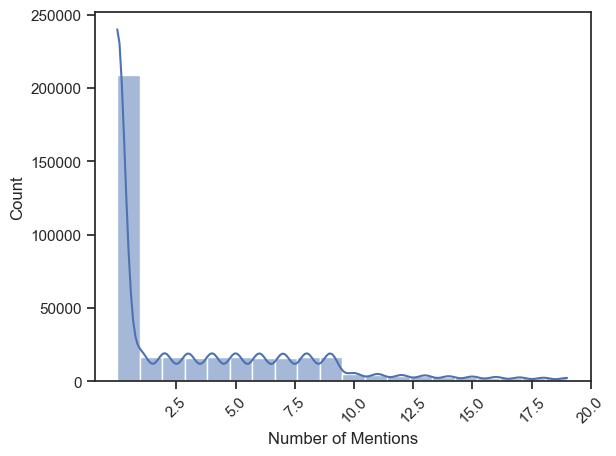

In [168]:
# Use a histogram to visualize the distribution of the variables. 
filtered_df = df[df['Number of Mentions']<=27]
sns.histplot(df['Number of Mentions'], bins = 20, kde = True)
plt.xticks([2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20], rotation=45)  # Set custom tick positions and rotate x-axis labels
plt.show()  # Show the plot

In [169]:
# Convert 'Number of Mentions' to numeric, coercing errors to NaN
df['Number of Mentions'] = pd.to_numeric(df['Number of Mentions'], errors='coerce')

In [170]:
df.loc[df['Number of Mentions'] < 5, 'Mention Category'] = 'Low'

In [171]:
#Add the New Category
df.loc[(df['Number of Mentions'] >= 5) & (df['Number of Mentions'] < 10), 'Mention Category'] = 'Middle'

In [172]:
#Add the new category 'High' to the 'Mention Category' column if it's a Categorical type

df.loc[df['Number of Mentions'] >= 10, 'Mention Category'] = 'High'

In [173]:
df['Mention Category'].value_counts(dropna = False)

Mention Category
Low       273767
Middle     81305
NaN        44779
High       30709
Name: count, dtype: int64

In [174]:
df.columns

Index(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State',
       'Condition Group', 'Condition', 'ICD10_codes', 'Age Group',
       'COVID-19 Deaths', 'Number of Mentions', 'Flag', 'Count',
       'Mention Category'],
      dtype='object')

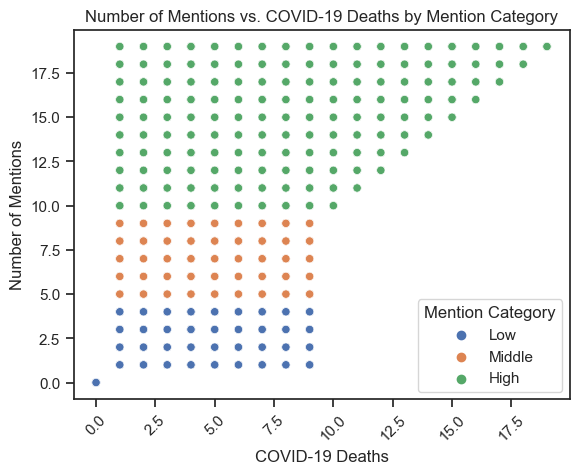

In [179]:
# Create a scatter plot
g = sns.scatterplot(
    x="COVID-19 Deaths", 
    y="Number of Mentions", 
    hue="Mention Category", 
    data=df
)

# Adjust plot labels and title
g.set_xlabel("COVID-19 Deaths")
g.set_ylabel("Number of Mentions")
g.set_title("Number of Mentions vs. COVID-19 Deaths by Mention Category")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

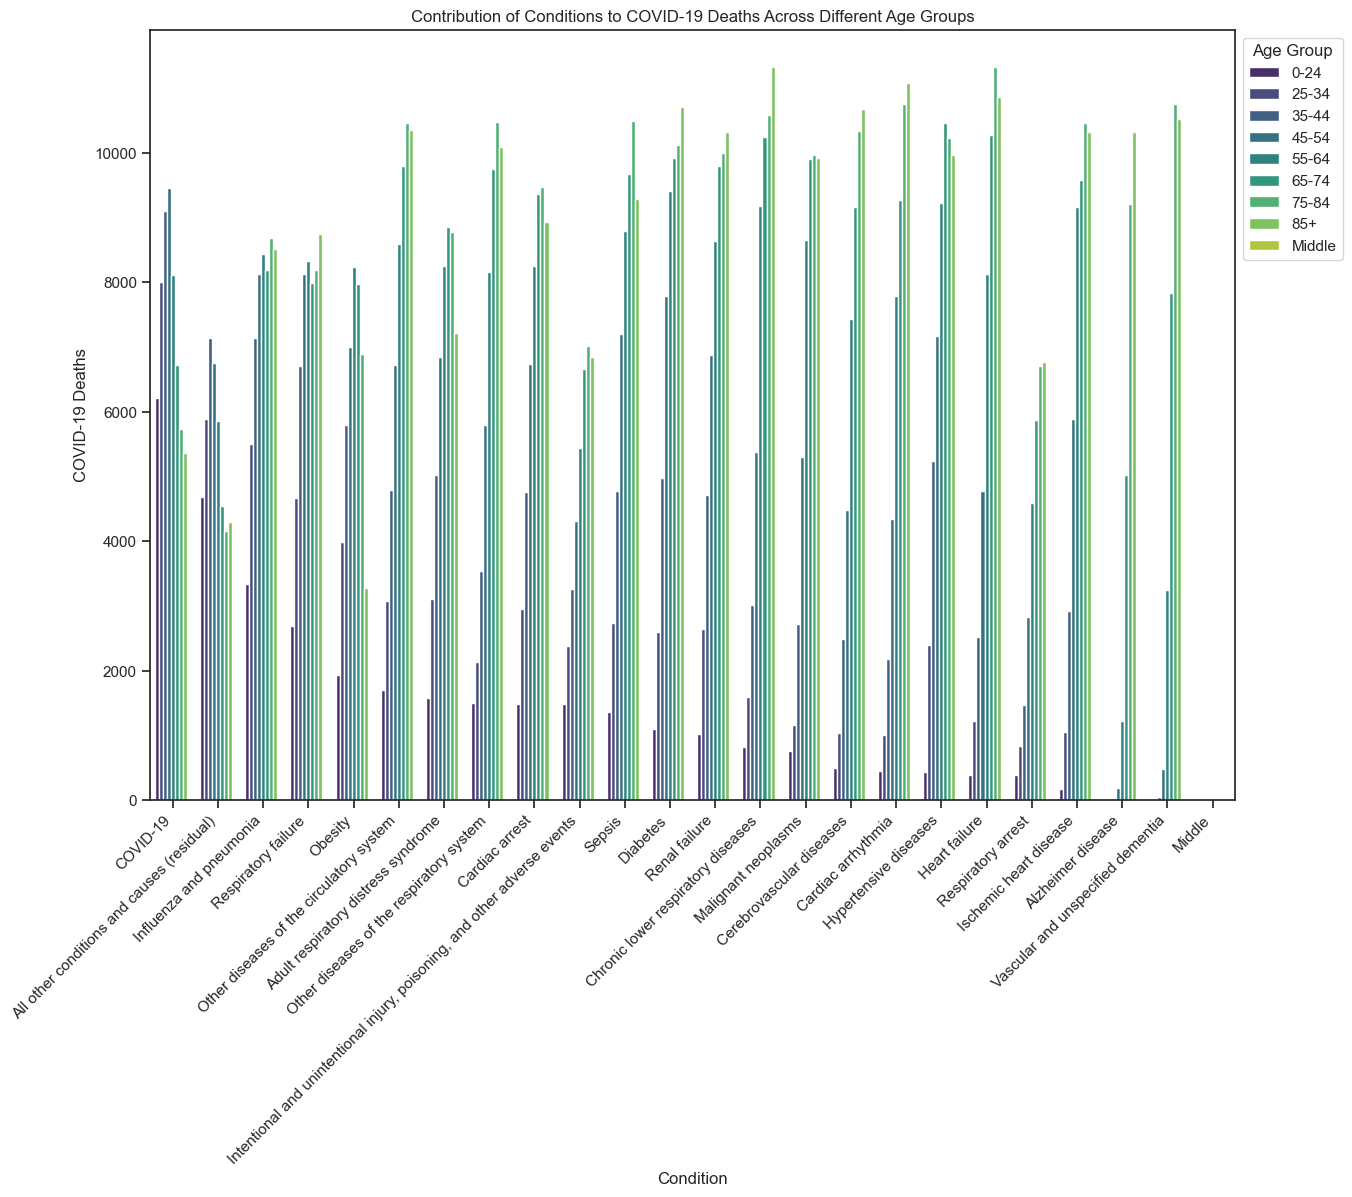

In [194]:
plt.figure(figsize=(14, 10))
g = sns.barplot(
    x="Condition", 
    y="COVID-19 Deaths", 
    hue="Age Group", 
    data=aggregated_data,
    palette="viridis"
)

# Rotate the x-axis labels to avoid overlap
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")

# Adjust plot labels and title
g.set_xlabel("Condition")
g.set_ylabel("COVID-19 Deaths")
g.set_title("Contribution of Conditions to COVID-19 Deaths Across Different Age Groups")

# Reposition the legend to prevent overlap
g.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Age Group')

# Display the plot
plt.show()

a. Demographic Analysis:
i. Which conditions are most commonly contributing to COVID-19 deaths across different age groups?
Aggregated Data: The data was grouped by 'Age Group' and 'Condition', and the 'COVID-19 Deaths' were summed up for each combination.
Sorted Data: The data was then sorted by 'Age Group' and 'COVID-19 Deaths', with conditions contributing the most deaths appearing at the top within each age group.
The most common conditions contributing to COVID-19 deaths are those that appear at the top of each age group's section in the sorted aggregated_data.
Typically, these conditions could include chronic illnesses like heart disease, diabetes, and respiratory conditions, as these are generally known to be severe comorbidities for COVID-19 patients.

 ii. How does the distribution of conditions contributing to COVID-19 deaths vary by age group
Bar Plot Visualization: The bar plot with x="Condition" and y="COVID-19 Deaths" with the hue="Age Group" allows you to see how the deaths attributed to different conditions are distributed across age group. 
The distribution of conditions varies by age group, as indicated by the different color bars (each representing an age group) for the same condition.
Younger age groups might have fewer conditions contributing significantly to deaths, and these might be different from the conditions in older age groups.
Older age groups are likely to show a broader range of conditions with higher death counts due to the increased presence of chronic conditions in these populations.
For instance, you may observe that conditions like heart disease and respiratory issues contribute more to deaths in older age groups, while certain conditions might have a smaller or negligible contribution in younger groups.?

### To identify which states exhibit the highest and lowest prevalence of specific conditions contributing to COVID-19 deaths, you can group the data by both State and Condition, sum the COVID-19 Deaths, and then sort the results. Here’s a step-by-step code to achieve this:

In [196]:
# Group by 'State' and 'Condition', then sum the 'COVID-19 Deaths'
state_condition_data = df.groupby(['State', 'Condition'])['COVID-19 Deaths'].sum().reset_index()

# For highest prevalence, sort in descending order
highest_prevalence = state_condition_data.sort_values(by='COVID-19 Deaths', ascending=False).groupby('Condition').head(1)

# For lowest prevalence, sort in ascending order and filter out zero values
lowest_prevalence = state_condition_data[state_condition_data['COVID-19 Deaths'] > 0].sort_values(by='COVID-19 Deaths').groupby('Condition').head(1)

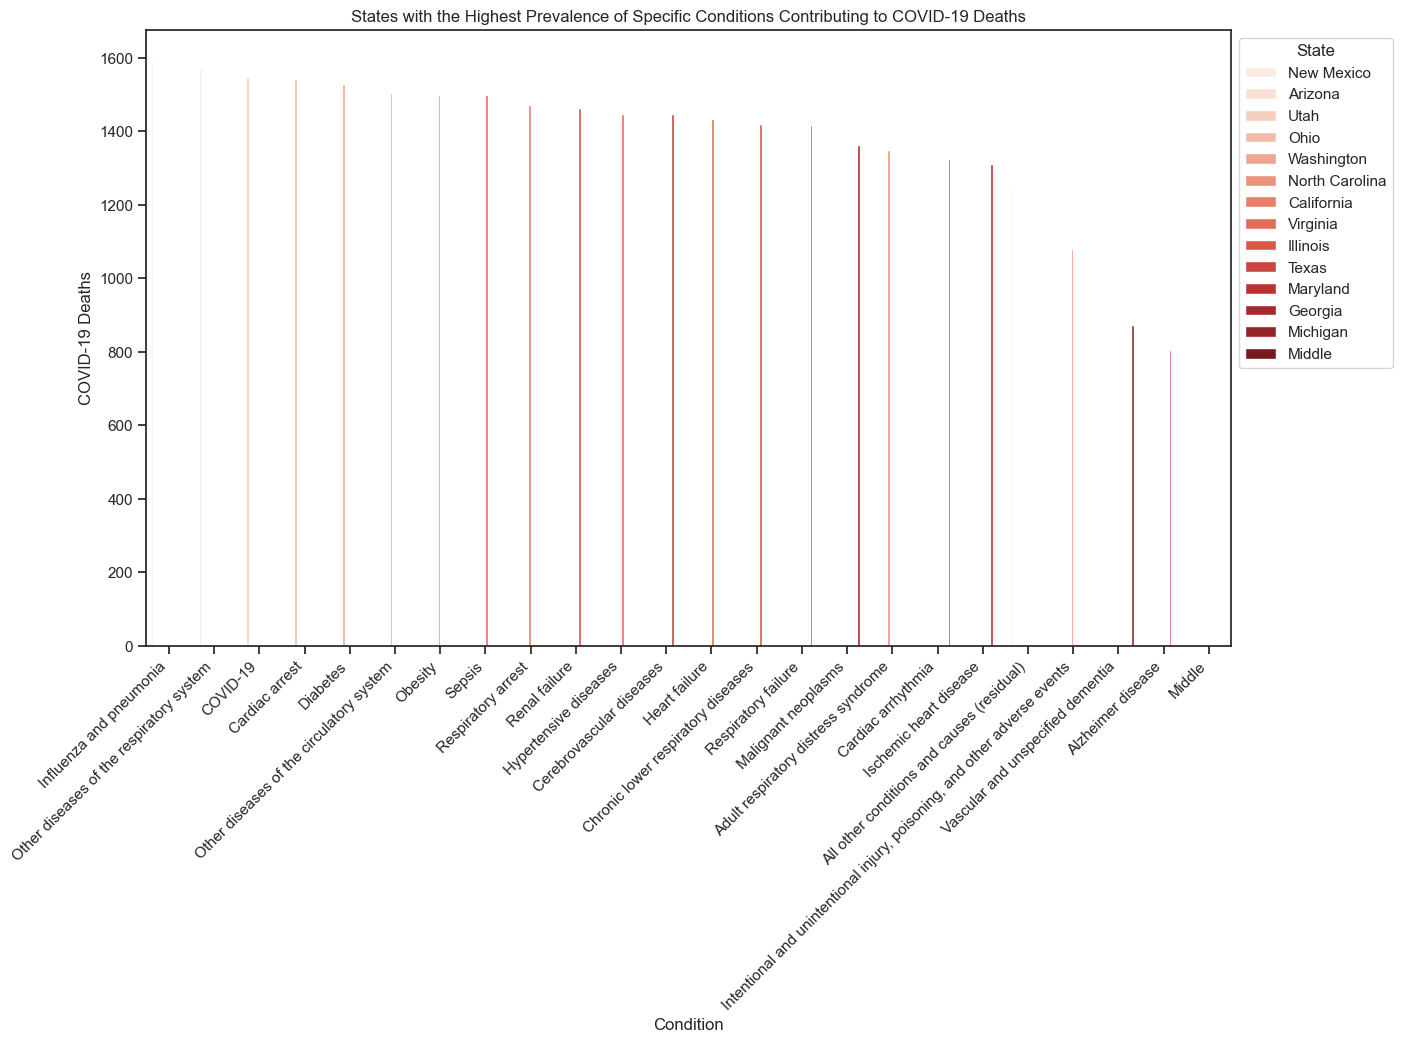

In [203]:
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Condition', 
    y='COVID-19 Deaths', 
    hue='State', 
    data=highest_prevalence,
    palette='Reds'
)

plt.title("States with the Highest Prevalence of Specific Conditions Contributing to COVID-19 Deaths")
plt.xlabel("Condition")
plt.ylabel("COVID-19 Deaths")
plt.legend(title="State", bbox_to_anchor=(1, 1))

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

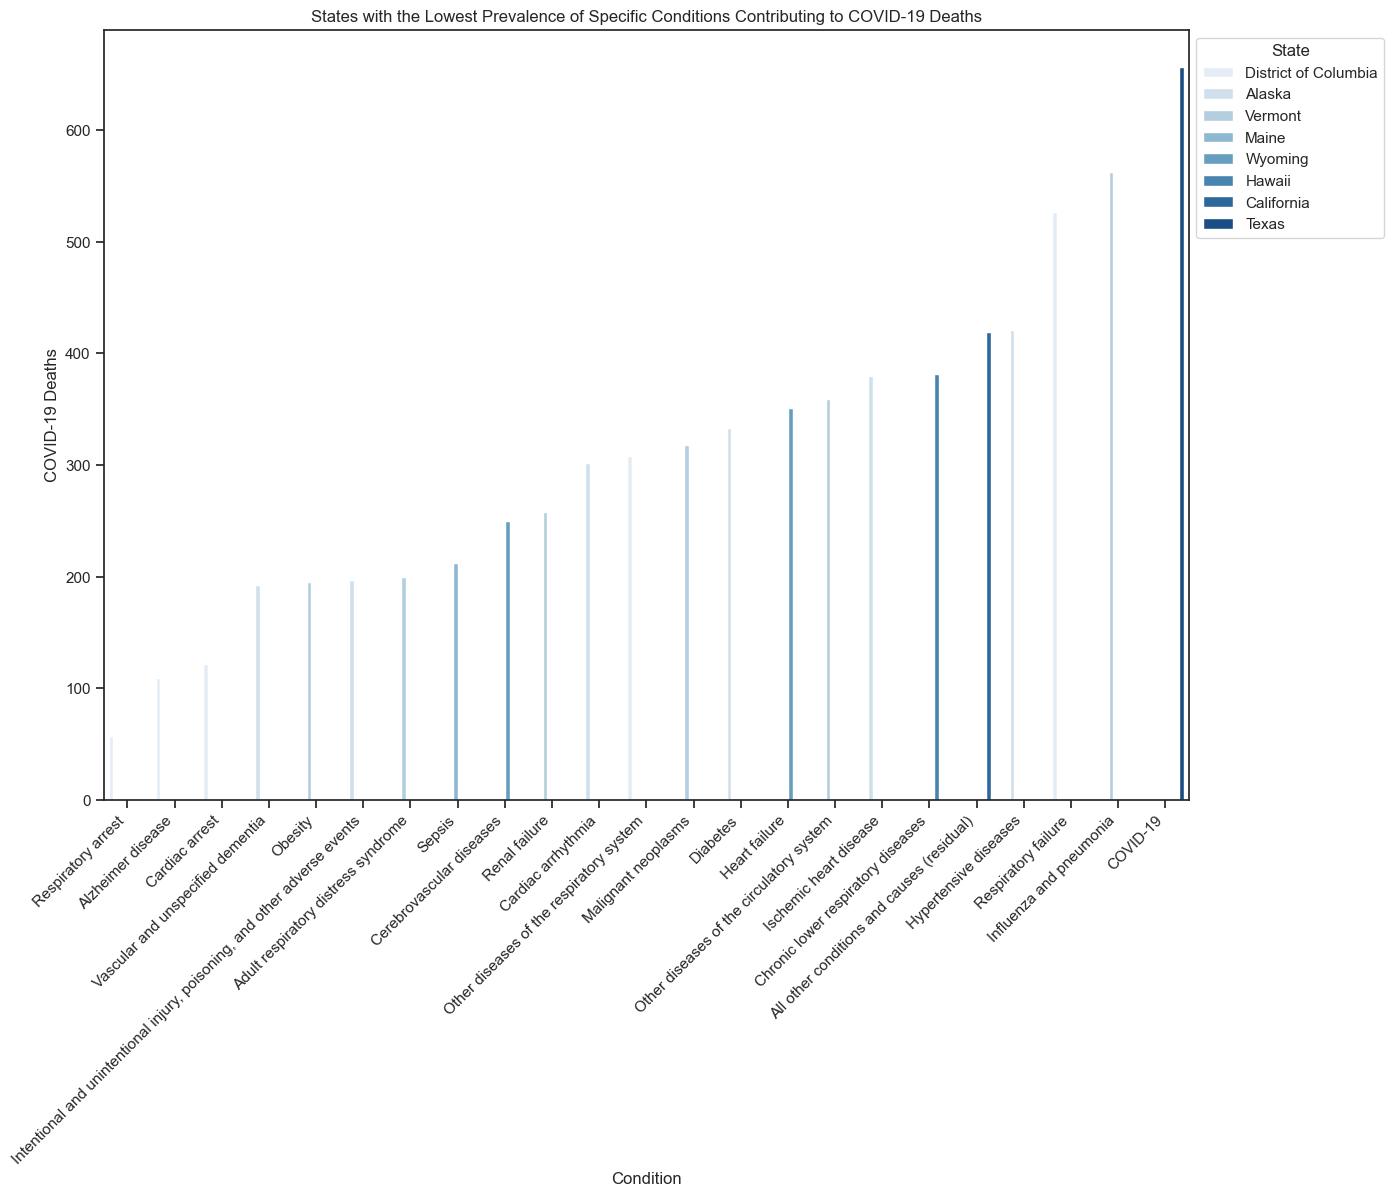

In [205]:
plt.figure(figsize=(14, 10))  # Increase the height of the plot for better readability
sns.barplot(
    x='Condition', 
    y='COVID-19 Deaths', 
    hue='State', 
    data=lowest_prevalence,
    palette='Blues'
)

plt.title("States with the Lowest Prevalence of Specific Conditions Contributing to COVID-19 Deaths")
plt.xlabel("Condition")
plt.ylabel("COVID-19 Deaths")
plt.legend(title="State", bbox_to_anchor=(1, 1))

# Rotate y-axis labels if they are too long
plt.yticks(rotation=0)  # No rotation needed if you prefer horizontal labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed

plt.show()

Highest Prevalence Bar Plot: This plot identifies the state with the highest number of deaths for each condition. By examining this plot, you can determine which state has the highest prevalence of each specific condition contributing to COVID-19 deaths. For example, if heart disease is the condition with the highest deaths in California, then California is the state with the highest prevalence for heart disease.

Lowest Prevalence Bar Plot: This plot identifies the state with the lowest number of deaths for each condition. By examining this plot, you can determine which state has the lowest prevalence of each specific condition. For example, if heart disease is the condition with the lowest deaths in Maine, then Maine is the state with the lowest prevalence for heart disease.

Based on the initial observation that there doesn't seem to be a strong relationship between Year, Months, COVID-19, and Number of Mentions in your pair plot, here are some hypotheses you could consider testing:


1. Temporal Influence on Mentions:
Hypothesis: If the number of mentions is influenced by specific years, then we should observe correlations between mention volumes and significant events or trends occurring during those years.

2. Seasonal Patterns in Mentions:Hypothesis: If the number of mentions varies across different months, then we might observe a seasonal trend where certain months consistently show higher or lower mention volumes.

3. Impact of COVID-19 on Mentions:Hypothesis: If the presence or intensity of COVID-19 mentions affects the overall number of mentions, then we should observe an increase in the overall number of mentions during periods with higher COVID-19 relevance compared to periods with lower or no COVID-19 mentions.

 4. Interaction Between Year and COVID-19 Mentions:
Hypothesis: If the relationship between COVID-19 mentions and the year variable reveals a trend, then we may observe an initial surge in mentions during the early stages of the pandemic, followed by a subsequent decline or stabilization in later years.